In [8]:
%pip install efficientnet_pytorch
%pip install pandas
%pip install tqdm
%pip install sklearn
%pip install torchvision
%pip install seaborn
%pip install opencv-python
%pip install mediapipe

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [9]:
# Check data directory
import os
os.listdir("../Face-Shape-EfficientNetB5/FaceShape Dataset")

['desktop.ini', 'testing_set', 'training_set']

In [10]:
import pandas as pd
import os
from PIL import Image
from tqdm.auto import tqdm
from sklearn.model_selection import train_test_split

import numpy as np
import cv2
import torchvision.transforms as transforms
from torch.autograd import Variable
import torch
import torch.nn as nn
import torch.nn.functional as F
from efficientnet_pytorch import EfficientNet

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [11]:
def convert_to_gray_train_val(data_dir):
    train, test = [], []
    for dset in os.listdir(data_dir):
        # check is directory
        subdir = os.path.join(data_dir, dset)
        if os.path.isdir(subdir):
            for label in os.listdir(subdir):
                imgdir = os.path.join(subdir, label)
                if os.path.isdir(imgdir):
                    for image_path in os.listdir(imgdir):
                        if image_path.endswith(".jpg"):
                            sample = {
                                "path": os.path.join(subdir, label, image_path),
                                "label": label
                            }
                            if dset == "training_set":
                                train.append(sample)
                            elif dset == "testing_set":
                                test.append(sample)



In [13]:
import glob
import os

import cv2
import mediapipe as mp
import numpy as np
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_face_mesh = mp.solutions.face_mesh

## 함수
# 디렉토리가 존재하지 않으면 생성
def makedirs(path): 
   try: 
        os.makedirs(path) 
   except OSError: 
       if not os.path.isdir(path): 
           raise


# 경로 설정 변수
readErrorImageList = []
saveErrorImageList = []
noneFaceErrorImageList = []
labels = [ 'Heart', 'Oblong', 'Oval', 'Round', 'Square' ]
setTypes = [ 'testing', 'training' ]

# 얼굴부분 crop
# haarcascade 불러오기
face_cascade = cv2.CascadeClassifier(
    cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Main
for setType in setTypes:
    print("Processing "+setType)
    for label in labels:
        print("Processing "+label)
        IMAGE_DIR = './imageSet/'+setType+'_set/'+label+'/'
        colorAug_DIR ='./imageSet/colorAug_'+setType+'_image/'+label+'/'
        makedirs(IMAGE_DIR)
        makedirs(colorAug_DIR)
        IMAGE_FILES = glob.glob(IMAGE_DIR+'*.jpg')
        
        # 표현되는 랜드마크의 굵기와 반경
        drawing_spec = mp_drawing.DrawingSpec(thickness=1, circle_radius=0)
        
        with mp_face_mesh.FaceMesh(
                static_image_mode=True,
                max_num_faces=1,
                refine_landmarks=True,
                min_detection_confidence=0.5) as face_mesh:
            for idx, file in enumerate(IMAGE_FILES):
                currentFileName = os.path.basename(file)


                # 이미지 불러오기
                image = cv2.imread(file)
                if image is None:
                    print("READ ERROR!!" + currentFileName)
                    readErrorImageList.append(currentFileName)
                    continue

                # 얼굴 crop
                faces = face_cascade.detectMultiScale(image, 1.3, 5)
                if len(faces) > 0:
                    print(faces)
                    color = (0, 0, 255)
                    for (x, y, w, h) in faces:
                        cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 2)
                        cropped = image[y: y+h, x: x+w]
                        
                        img_yuv = cv2.cvtColor(cropped, cv2.COLOR_BGR2YUV)

                        # equalize the histogram of the Y channel
                        img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])

                        # convert the YUV image back to RGB format
                        equalized = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)

                        #edge enhancement
                        kernel = np.array([[0, -1, 0],
                                    [-1, 5,-1],
                                    [0, -1, 0]])
                        image_sharp = cv2.filter2D(src=equalized, ddepth=-1, kernel=kernel)
                        
                    writeReturn = cv2.imwrite(colorAug_DIR+ currentFileName, image_sharp)
                    if writeReturn == True:
                        print("successfully saved image!!" + currentFileName)
                    else: 
                        print("SAVE ERROR!!" + currentFileName)
                        saveErrorImageList.append(currentFileName)
                else:
                    print("SAVE ERROR!!" + currentFileName)
                    noneFaceErrorImageList.append(currentFileName)
                
        print("Done "+label)
    print("Done "+setType)
    
for idx, readErrorImage in enumerate(readErrorImageList):
    print(idx, "Read Error Image: ", readErrorImage)
    
for idx, saveErrorImage in enumerate(saveErrorImageList):
    print(idx, "Save Error Image: ", saveErrorImage)
    
for idx, noneFaceErrorImage in enumerate(noneFaceErrorImageList):
    print(idx, "None Face Error Image: ", noneFaceErrorImage)

Processing testing
Processing Heart
[[ 94  54 160 160]]
successfully saved image!!heart (101).jpg
[[ 77  60 168 168]]
successfully saved image!!heart (102).jpg
[[185 170 313 313]]
successfully saved image!!heart (123).jpg
[[ 85 216 448 448]]
successfully saved image!!heart (13).jpg
[[126 103 126 126]]
successfully saved image!!heart (135).jpg
[[139  91 195 195]]
successfully saved image!!heart (136).jpg
[[136 142 498 498]]
successfully saved image!!heart (137).jpg
[[192  96 727 727]]
successfully saved image!!heart (138).jpg
[[159 168 464 464]]
successfully saved image!!heart (139).jpg
[[ 97  65 183 183]]
successfully saved image!!heart (140).jpg
[[131 180 376 376]]
successfully saved image!!heart (141).jpg
[[ 498  389 1890 1890]]
successfully saved image!!heart (156).jpg
[[ 48  82 165 165]]
successfully saved image!!heart (161).jpg
[[72 48 95 95]]
successfully saved image!!heart (163).jpg
[[159 177 698 698]]
successfully saved image!!heart (189).jpg
[[156  97 354 354]]
successfully sa

In [ ]:
import glob
import os

import cv2
import mediapipe as mp
import numpy as np
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_face_mesh = mp.solutions.face_mesh

## 함수
# 디렉토리가 존재하지 않으면 생성
def makedirs(path): 
   try: 
        os.makedirs(path) 
   except OSError: 
       if not os.path.isdir(path): 
           raise


# 경로 설정 변수
readErrorImageList = []
saveErrorImageList = []
noneFaceErrorImageList = []
labels = [ 'Heart', 'Oblong', 'Oval', 'Round', 'Square' ]
setTypes = [ 'testing', 'training' ]

# 얼굴부분 crop
# haarcascade 불러오기
face_cascade = cv2.CascadeClassifier(
    cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Main
for setType in setTypes:
    print("Processing "+setType)
    for label in labels:
        print("Processing "+label)
        IMAGE_DIR = './imageSet/'+setType+'_set/'+label+'/'
        grayAug_DIR ='./imageSet/grayAug_'+setType+'_image/'+label+'/'
        makedirs(IMAGE_DIR)
        makedirs(grayAug_DIR)
        IMAGE_FILES = glob.glob(IMAGE_DIR+'*.jpg')
        
        # 표현되는 랜드마크의 굵기와 반경
        drawing_spec = mp_drawing.DrawingSpec(thickness=1, circle_radius=0)
        
        with mp_face_mesh.FaceMesh(
                static_image_mode=True,
                max_num_faces=1,
                refine_landmarks=True,
                min_detection_confidence=0.5) as face_mesh:
            for idx, file in enumerate(IMAGE_FILES):
                currentFileName = os.path.basename(file)


                # 이미지 불러오기
                image = cv2.imread(file)
                if image is None:
                    print("READ ERROR!!" + currentFileName)
                    readErrorImageList.append(currentFileName)
                    continue
                gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

                # 얼굴 crop
                faces = face_cascade.detectMultiScale(gray, 1.3, 5)
                if len(faces) > 0:
                    print(faces)
                    color = (0, 0, 255)
                    for (x, y, w, h) in faces:
                        cv2.rectangle(gray, (x, y), (x + w, y + h), (255, 0, 0), 2)
                        cropped = gray[y: y+h, x: x+w]
                        
                        equalized = cv2.equalizeHist(cropped)

                        #edge enhancement
                        kernel = np.array([[0, -1, 0],
                                    [-1, 5,-1],
                                    [0, -1, 0]])
                        image_sharp = cv2.filter2D(src=equalized, ddepth=-1, kernel=kernel)
                        
                    writeReturn = cv2.imwrite(grayAug_DIR+ currentFileName, image_sharp)
                    if writeReturn == True:
                        print("successfully saved image!!" + currentFileName)
                    else: 
                        print("SAVE ERROR!!" + currentFileName)
                        saveErrorImageList.append(currentFileName)
                else:
                    print("SAVE ERROR!!" + currentFileName)
                    noneFaceErrorImageList.append(currentFileName)
                
        print("Done "+label)
    print("Done "+setType)
    
for idx, readErrorImage in enumerate(readErrorImageList):
    print(idx, "Read Error Image: ", readErrorImage)
    
for idx, saveErrorImage in enumerate(saveErrorImageList):
    print(idx, "Save Error Image: ", saveErrorImage)
    
for idx, noneFaceErrorImage in enumerate(noneFaceErrorImageList):
    print(idx, "None Face Error Image: ", noneFaceErrorImage)

In [14]:
import glob
import os
from PIL import Image, ImageOps

import cv2
import mediapipe as mp
import numpy as np
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_face_mesh = mp.solutions.face_mesh

## 함수
# 디렉토리가 존재하지 않으면 생성
def makedirs(path): 
   try: 
        os.makedirs(path) 
   except OSError: 
       if not os.path.isdir(path): 
           raise


# 경로 설정 변수
readErrorImageList = []
saveErrorImageList = []
noneFaceErrorImageList = []
labels = [ 'Heart', 'Oblong', 'Oval', 'Round', 'Square' ]
setTypes = [ 'testing', 'training' ]

# Main
for setType in setTypes:
    for label in labels:
        print("Processing "+setType+" "+label)
        grayAug_DIR ='./imageSet/colorAug/colorAug_'+setType+'_image/'+label+'/'
        color_poster_DIR ='./imageSet/color_poster_'+setType+'_image/'+label+'/'
        makedirs(color_poster_DIR)
        IMAGE_FILES = glob.glob(grayAug_DIR+'*.jpg')
        
        # 표현되는 랜드마크의 굵기와 반경
        drawing_spec = mp_drawing.DrawingSpec(thickness=1, circle_radius=0)
        
        for idx, file in enumerate(IMAGE_FILES):
            currentFileName = os.path.basename(file)
            
            # 이미지 불러오기
            image = Image.open(file)
            if image is None:
                print("READ ERROR!!" + currentFileName)
                readErrorImageList.append(currentFileName)
                continue

            image2 = ImageOps.posterize(image, 2)
            image2.save(color_poster_DIR + currentFileName)
            

        print("Done "+label)
    print("Done "+setType)

Processing testing Heart
Done Heart
Processing testing Oblong
Done Oblong
Processing testing Oval
Done Oval
Processing testing Round
Done Round
Processing testing Square
Done Square
Done testing
Processing training Heart
Done Heart
Processing training Oblong
Done Oblong
Processing training Oval
Done Oval
Processing training Round
Done Round
Processing training Square
Done Square
Done training


4.6.0


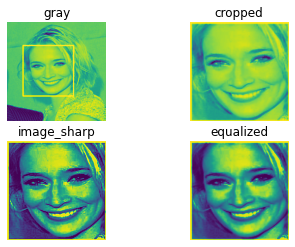

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageOps

print(cv2.__version__)

# 얼굴부분 crop
# haarcascade 불러오기
face_cascade = cv2.CascadeClassifier(
    cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# 이미지 불러오기
img = cv2.imread('../Face-Shape-EfficientNetB5/imageSet/training_set/Heart/heart (2).jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = cv2.resize(gray, (200, 200))

# 얼굴 찾기
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
for (x, y, w, h) in faces:
    cv2.rectangle(gray, (x, y), (x + w, y + h), (255, 0, 0), 2)
    cropped = gray[y: y+h, x: x+w]
    
    equalized = cv2.equalizeHist(cropped)

    #edge enhancement
    kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]])
    image_sharp = cv2.filter2D(src=equalized, ddepth=-1, kernel=kernel)
    
    # 이미지 저장하기
    #cv2.imwrite("./imageSet/croptest.jpg", image_sharp)
    #cv2.imshow('image_sharp', image_sharp)
    #cv2.waitKey()
    #cv2.destroyWindow('image_sharp')

    fig = plt.figure()

    ax1 = fig.add_subplot(2, 2, 1)
    ax1.imshow(gray) 
    ax1.set_title('gray') 
    ax1.axis("off") 
    
    ax2 = fig.add_subplot(2, 2, 2)
    ax2.imshow(cropped)
    ax2.set_title('cropped')
    ax2.axis("off")

    ax1 = fig.add_subplot(2, 2, 3)
    ax1.imshow(image_sharp) 
    ax1.set_title('image_sharp') 
    ax1.axis("off") 
    
    ax2 = fig.add_subplot(2, 2, 4)
    ax2.imshow(equalized)
    ax2.set_title('equalized')
    ax2.axis("off")

    plt.show()

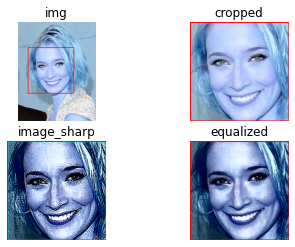

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageOps

# 얼굴부분 crop
# haarcascade 불러오기
face_cascade = cv2.CascadeClassifier(
    cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# 이미지 불러오기
img = cv2.imread('./imageSet/training_set/Heart/heart (2).jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 얼굴 찾기
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)
    cropped = img[y: y+h, x: x+w]
    resize = cv2.resize(cropped, (200, 200))

    cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)

    
    img_yuv = cv2.cvtColor(cropped, cv2.COLOR_BGR2YUV)

    # equalize the histogram of the Y channel
    img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])

    # convert the YUV image back to RGB format
    img_output = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)

    #edge enhancement
    kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]])
    image_sharp_c = cv2.filter2D(src=img_output, ddepth=-1, kernel=kernel)

    # 이미지 저장하기
    cv2.imwrite("./imageSet/croptest.jpg", resize)

    #cv2.imshow("crop&resize", resize)
    #cv2.waitKey(0)
    #cv2.destroyAllWindows()

    fig = plt.figure()

    ax1 = fig.add_subplot(2, 2, 1)
    ax1.imshow(img) 
    ax1.set_title('img') 
    ax1.axis("off") 
    
    ax2 = fig.add_subplot(2, 2, 2)
    ax2.imshow(cropped)
    ax2.set_title('cropped')
    ax2.axis("off")

    ax1 = fig.add_subplot(2, 2, 3)
    ax1.imshow(image_sharp_c) 
    ax1.set_title('image_sharp') 
    ax1.axis("off")
    
    ax2 = fig.add_subplot(2, 2, 4)
    ax2.imshow(img_output)
    ax2.set_title('equalized')
    ax2.axis("off")